# Problem Set 1 - Neural network implementation

##### Team members:
- Giulia Maria Petrilli
- Nicolas Reichardt
- Elena Murray

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

##### AI disclaimer:

XXXXXXXX 
XXXXXXXX  
XXXXXXXX  


## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import itertools


from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *

/opt/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/miniconda3/envs/nlp/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/miniconda3/envs/nlp/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` in

In [2]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data

In [3]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



### ML Model & Training

In [4]:
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

Epoch: 1, Training Time: 0.22s, Training Accuracy: 23.62%, Validation Accuracy: 22.00%
Epoch: 2, Training Time: 0.44s, Training Accuracy: 28.75%, Validation Accuracy: 29.00%
Epoch: 3, Training Time: 0.66s, Training Accuracy: 36.00%, Validation Accuracy: 33.50%
Epoch: 4, Training Time: 0.90s, Training Accuracy: 45.25%, Validation Accuracy: 39.50%
Epoch: 5, Training Time: 1.15s, Training Accuracy: 54.00%, Validation Accuracy: 49.00%
Epoch: 6, Training Time: 1.36s, Training Accuracy: 60.00%, Validation Accuracy: 56.00%
Epoch: 7, Training Time: 1.59s, Training Accuracy: 65.75%, Validation Accuracy: 61.00%
Epoch: 8, Training Time: 1.81s, Training Accuracy: 69.12%, Validation Accuracy: 65.50%
Epoch: 9, Training Time: 2.03s, Training Accuracy: 70.75%, Validation Accuracy: 67.00%
Epoch: 10, Training Time: 2.27s, Training Accuracy: 72.25%, Validation Accuracy: 68.00%
Epoch: 11, Training Time: 2.49s, Training Accuracy: 73.62%, Validation Accuracy: 70.50%
Epoch: 12, Training Time: 2.73s, Training

### Test cosine annealing scheduler

In [5]:
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.22s, Training Accuracy: 88.50%, Validation Accuracy: 80.00%
Epoch: 2, Training Time: 0.45s, Training Accuracy: 88.50%, Validation Accuracy: 79.50%
Epoch: 3, Training Time: 0.67s, Training Accuracy: 88.50%, Validation Accuracy: 79.50%
Epoch: 4, Training Time: 0.88s, Training Accuracy: 88.75%, Validation Accuracy: 79.50%
Epoch: 5, Training Time: 1.12s, Training Accuracy: 88.75%, Validation Accuracy: 79.00%
Epoch: 6, Training Time: 1.38s, Training Accuracy: 88.88%, Validation Accuracy: 79.00%
Epoch: 7, Training Time: 1.61s, Training Accuracy: 88.88%, Validation Accuracy: 79.00%
Epoch: 8, Training Time: 1.88s, Training Accuracy: 88.75%, Validation Accuracy: 79.00%
Epoch: 9, Training Time: 2.13s, Training Accuracy: 88.75%, Validation Accuracy: 80.00%
Epoch: 10, Training Time: 2.35s, Training Accuracy: 88.75%, Validation Accuracy: 80.00%
Epoch: 11, Training Time: 2.58s, Training Accuracy: 89.00%, Validation Accuracy: 79.50%
Epoch: 12, Training Time: 2.80s, Training

### Test residual neural network

In [6]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=1, epochs=50) # The learning rate was changed from 1 to 0.1 because it overshoots overwise.
res_nn.fit(x_train, y_train, x_val, y_val)

Residual network initialized with hidden layer size: 128
Epoch: 1, Training Time: 0.22s, Training Accuracy: 9.62%, Validation Accuracy: 11.00%
Epoch: 2, Training Time: 0.44s, Training Accuracy: 9.88%, Validation Accuracy: 10.50%
Epoch: 3, Training Time: 0.67s, Training Accuracy: 11.62%, Validation Accuracy: 12.00%
Epoch: 4, Training Time: 0.89s, Training Accuracy: 9.88%, Validation Accuracy: 10.50%
Epoch: 5, Training Time: 1.11s, Training Accuracy: 9.62%, Validation Accuracy: 11.00%
Epoch: 6, Training Time: 1.33s, Training Accuracy: 9.62%, Validation Accuracy: 11.00%
Epoch: 7, Training Time: 1.56s, Training Accuracy: 9.62%, Validation Accuracy: 11.00%
Epoch: 8, Training Time: 1.78s, Training Accuracy: 12.00%, Validation Accuracy: 10.00%
Epoch: 9, Training Time: 2.00s, Training Accuracy: 12.00%, Validation Accuracy: 10.00%
Epoch: 10, Training Time: 2.22s, Training Accuracy: 9.75%, Validation Accuracy: 9.50%
Epoch: 11, Training Time: 2.44s, Training Accuracy: 11.62%, Validation Accuracy:

## B) Neural Network Classifier using Torch

### Data

In [7]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 9.67MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 243kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.23MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.57MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### ML Model & Training

In [8]:
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.2, epochs=50, random_state=GLOBAL_RANDOM_STATE)
torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.67s, Learning Rate: 0.2, Training Accuracy: 12.10%, Validation Accuracy: 10.20%
Epoch: 2, Training Time: 1.38s, Learning Rate: 0.2, Training Accuracy: 41.10%, Validation Accuracy: 38.40%
Epoch: 3, Training Time: 2.03s, Learning Rate: 0.2, Training Accuracy: 56.10%, Validation Accuracy: 52.90%
Epoch: 4, Training Time: 2.62s, Learning Rate: 0.2, Training Accuracy: 66.80%, Validation Accuracy: 61.30%
Epoch: 5, Training Time: 3.24s, Learning Rate: 0.2, Training Accuracy: 72.70%, Validation Accuracy: 66.70%
Epoch: 6, Training Time: 3.83s, Learning Rate: 0.2, Training Accuracy: 76.50%, Validation Accuracy: 68.30%
Epoch: 7, Training Time: 4.41s, Learning Rate: 0.2, Training Accuracy: 78.80%, Validation Accuracy: 69.80%
Epoch: 8, Training Time: 4.99s, Learning Rate: 0.2, Training Accuracy: 81.30%, Validation Accuracy: 70.20%
Epoch: 9, Training Time: 5.57s, Learning Rate: 0.2, Training Accuracy: 83.00%, Validation Accuracy: 72.10%
Epoch: 10, Training Time: 6.16s, Lear

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

### Accuracy comparison of the trained models

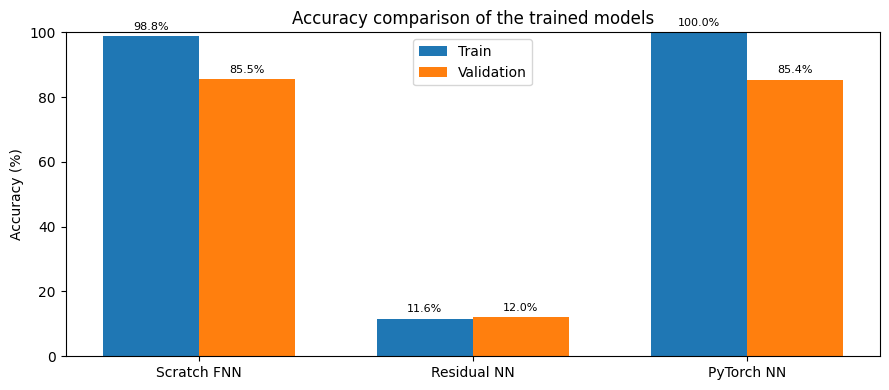

In [9]:

 # Accuracy measurement for each model
scratch_train_acc = fnn.compute_accuracy(x_train, y_train)
scratch_val_acc = fnn.compute_accuracy(x_val, y_val)

res_train_acc = res_nn.compute_accuracy(x_train, y_train)
res_val_acc = res_nn.compute_accuracy(x_val, y_val)

torch_train_acc = torch_nn.compute_accuracy(train_loader).item()
torch_val_acc = torch_nn.compute_accuracy(val_loader).item()

# Convert to percentages
models = ['Scratch FNN', 'Residual NN', 'PyTorch NN']
train_accuracies = [scratch_train_acc * 100.0, res_train_acc * 100.0, torch_train_acc * 100.0]
val_accuracies = [scratch_val_acc * 100.0, res_val_acc * 100.0, torch_val_acc * 100.0]

# Plotting the results
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(9, 4))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
rects2 = ax.bar(x + width/2, val_accuracies, width, label='Validation')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy comparison of the trained models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 100)
ax.legend()

# Annotating the bars
for rects in (rects1, rects2):
    for r in rects:
        h = r.get_height()
        ax.annotate(f'{h:.1f}%',
                    xy=(r.get_x() + r.get_width() / 2, h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Optional hyperparamter tuning

Epoch: 1, Training Time: 0.19s, Training Accuracy: 19.00%, Validation Accuracy: 13.50%
Epoch: 2, Training Time: 0.39s, Training Accuracy: 22.12%, Validation Accuracy: 17.00%
Epoch: 3, Training Time: 0.59s, Training Accuracy: 23.50%, Validation Accuracy: 19.00%
Epoch: 4, Training Time: 0.79s, Training Accuracy: 26.00%, Validation Accuracy: 21.50%
Epoch: 5, Training Time: 0.99s, Training Accuracy: 29.25%, Validation Accuracy: 25.50%
Epoch: 6, Training Time: 1.20s, Training Accuracy: 34.00%, Validation Accuracy: 31.00%
Epoch: 7, Training Time: 1.39s, Training Accuracy: 38.00%, Validation Accuracy: 35.00%
Epoch: 8, Training Time: 1.58s, Training Accuracy: 41.75%, Validation Accuracy: 39.00%
Epoch: 9, Training Time: 1.78s, Training Accuracy: 45.75%, Validation Accuracy: 41.00%
Epoch: 10, Training Time: 1.98s, Training Accuracy: 50.00%, Validation Accuracy: 44.50%
Epoch: 11, Training Time: 2.23s, Training Accuracy: 53.12%, Validation Accuracy: 48.50%
Epoch: 12, Training Time: 2.45s, Training

,model,learning_rate,epochs,cosine_annealing,train_acc,val_acc
0,PyTorch NN,0.20,50,None,100.000000,85.399997
1,PyTorch NN,0.10,50,None,100.000000,84.299999
2,Scratch FNN,0.20,50,False,97.875000,84.000000
3,Residual NN,0.20,20,True,96.750000,84.000000
4,Residual NN,0.20,20,False,96.750000,84.000000
5,Scratch FNN,0.20,50,True,97.875000,84.000000
6,PyTorch NN,0.20,20,None,96.300000,82.499999
7,PyTorch NN,0.05,50,None,96.899998,82.499999
8,Residual NN,0.10,20,True,91.625000,81.500000
9,Residual NN,0.10,20,False,91.625000,81.500000


Best: PyTorch NN | lr=0.2 | epochs=50 | cosine=None | val_acc=85.40%


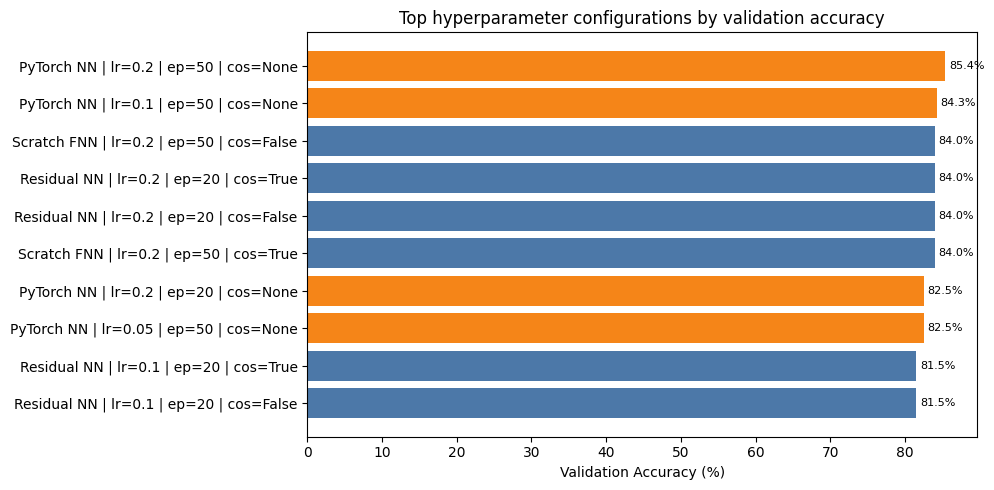

In [10]:
# Configuring the grids for grid search
scratch_sizes = [784, 128, 64, 10]
resnet_sizes = [784, 128, 128, 10]

scratch_lrs = [0.05, 0.1, 0.2]
scratch_epochs = [20, 50]
scratch_cosine = [False, True]

torch_lrs = [0.05, 0.1, 0.2]
torch_epochs = [20, 50]

results = []

def evaluate_scratch(model_cls, sizes, lr, epochs, cosine):
    model = model_cls(sizes=sizes, learning_rate=lr, epochs=epochs, random_state=GLOBAL_RANDOM_STATE)
    model.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=cosine)
    train_acc = model.compute_accuracy(x_train, y_train) * 100.0
    val_acc = model.compute_accuracy(x_val, y_val) * 100.0
    return train_acc, val_acc

def evaluate_torch(lr, epochs):
    model = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=lr, epochs=epochs, random_state=GLOBAL_RANDOM_STATE)
    model.fit(train_loader, val_loader)
    train_acc = model.compute_accuracy(train_loader).item() * 100.0
    val_acc = model.compute_accuracy(val_loader).item() * 100.0
    return train_acc, val_acc

# Scratch FNN
for lr, ep, cos in itertools.product(scratch_lrs, scratch_epochs, scratch_cosine):
    tr, va = evaluate_scratch(Network, scratch_sizes, lr, ep, cos)
    results.append(dict(model='Scratch FNN', learning_rate=lr, epochs=ep, cosine_annealing=cos,
                        train_acc=tr, val_acc=va))

# Residual NN
for lr, ep, cos in itertools.product(scratch_lrs, scratch_epochs, scratch_cosine):
    tr, va = evaluate_scratch(ResNetwork, resnet_sizes, lr, ep, cos)
    results.append(dict(model='Residual NN', learning_rate=lr, epochs=ep, cosine_annealing=cos,
                        train_acc=tr, val_acc=va))

# PyTorch NN
for lr, ep in itertools.product(torch_lrs, torch_epochs):
    tr, va = evaluate_torch(lr, ep)
    results.append(dict(model='PyTorch NN', learning_rate=lr, epochs=ep, cosine_annealing=None,
                        train_acc=tr, val_acc=va))

df = pd.DataFrame(results).sort_values('val_acc', ascending=False).reset_index(drop=True)
display(df.head(10))

best = df.iloc[0]
print(f"Best: {best['model']} | lr={best['learning_rate']} | epochs={best['epochs']} "
      f"| cosine={best['cosine_annealing']} | val_acc={best['val_acc']:.2f}%")

# Plot top-N
top_n = min(10, len(df))
top = df.head(top_n)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(range(top_n), top['val_acc'], color=['#4C78A8' if m!='PyTorch NN' else '#F58518' for m in top['model']])
ax.set_yticks(range(top_n))
ax.set_yticklabels([
    f"{r['model']} | lr={r['learning_rate']} | ep={int(r['epochs'])} | cos={r['cosine_annealing']}"
    for _, r in top.iterrows()
])
ax.invert_yaxis()
ax.set_xlabel('Validation Accuracy (%)')
ax.set_title('Top hyperparameter configurations by validation accuracy')
for i, v in enumerate(top['val_acc']):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=8)
plt.tight_layout()
plt.show()